# Importing Libraries


In [1]:
#Importing Libraries for ML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif

import warnings
warnings.filterwarnings("ignore")

# Importing Cleaned Data

In [2]:
df = pd.read_csv('cleaned_data.csv')
df.head(3)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00696     0.01633       0.05233  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033     1.0  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085     1.0  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651     1.0  0.429895  0.825288 -4.443179   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  

[3 rows x 24 columns]

# Data Exploration (EDA)

1. Univariate analysis on numerical data
2. Bivariate analysis on numerical data vs numerical data
3. Multivariate analysis on numerical data

## Univariate analysis on numerical data

### Descriptive Statistics

In [3]:
# Function to create dataframe for columns and its unique count of values, datatypes and type of columns
def find_categorical_continous_variables(data, threashold):
    dic = {}
    continus_cols = []
    categorical_cols = []

    for column in data.columns:
        li = []
        li.append(len(data[column].unique()))
        li.append(data[column].dtype)

        # Check if the column is categorical or continuous
        if len(data[column].unique()) <= threashold or data[column].dtype == 'O':
            li.append("Categorical column")
            categorical_cols.append(column)
        else:
            li.append("Continous Column")
            continus_cols.append(column)

        dic[column] = li
    
    # create dataframe for columns and its details
    dic_df = pd.DataFrame(dic, index=["Unique values", "Data Type", "Categorical/Continous"])
    
    # return the dataframe, and lists for continous and categorical columns
    return dic_df.T, categorical_cols, continus_cols

# Function to find descriptive statistics by providing it the contious cols and dataframe
def descriptive_statistics_continous(df, continus_cols):
    dic={}
    for col in continus_cols:
        dic[col] = []
        dic[col].append(df[col].mean())
        dic[col].append(df[col].median())
        dic[col].append(df[col].mode()[0])
        dic[col].append(df[col].std())
        dic[col].append(df[col].var())
        dic[col].append(df[col].max() - df[col].min())
        dic[col].append(df[col].quantile(0.75) - df[col].quantile(0.25) )
        dic[col].append(df[col].skew())
        dic[col].append(df[col].kurtosis())

    df_details = pd.DataFrame(dic, index=["Mean", "Median", "Mode", "Std Deviation", "Variance", "Range", "IQR", "Skew", "Kurtosis"])
    return df_details.T



In [4]:
# lets find out the unique counts, datatypes, variable type like continous/categorical and lists for columns names having continous/categorical columns
col_type_df, categorical_cols, continus_cols = find_categorical_continous_variables(df, 10)

In [5]:
# display the data
col_type_df

Unique values Data Type Categorical/Continous
name                       189    object    Categorical column
MDVP:Fo(Hz)                189   float64      Continous Column
MDVP:Fhi(Hz)               179   float64      Continous Column
MDVP:Flo(Hz)               189   float64      Continous Column
MDVP:Jitter(%)             156   float64      Continous Column
MDVP:Jitter(Abs)            12   float64      Continous Column
MDVP:RAP                   137   float64      Continous Column
MDVP:PPQ                   146   float64      Continous Column
Jitter:DDP                 162   float64      Continous Column
MDVP:Shimmer               176   float64      Continous Column
MDVP:Shimmer(dB)           136   float64      Continous Column
Shimmer:APQ3               176   float64      Continous Column
Shimmer:APQ5               172   float64      Continous Column
MDVP:APQ                   173   float64      Continous Column
Shimmer:DDA                180   float64      Continous Column
NHR                        164   float64      Continous Column
HNR                        189   float64      Continous Column
status                       2   float64    Categorical column
RPDE                       189   float64      Continous Column
DFA                        189   float64      Continous Column
spread1                    189   float64      Continous Column
spread2                    188   float64      Continous Column
D2                         189   float64      Continous Column
PPE                        186   float64      Continous Column

In [6]:
# print columns 
print("Categorical Columns -\n",categorical_cols, "\n")
print("Continous Columns -\n",continus_cols)

Categorical Columns -
 ['name', 'status'] 

Continous Columns -
 ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


### Conclusion - 
1. We have two categorical variables i.e. ['name', 'status']


2. We have 22 Continous variables i.e. ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

In [7]:
# Get the descriptive statistics 
descriptive_statistics_continous(df, continus_cols)

Mean      Median        Mode  Std Deviation  \
MDVP:Fo(Hz)       154.605011  148.790000   88.333000      41.525291   
MDVP:Fhi(Hz)      189.093185  176.595000  357.351500      62.841375   
MDVP:Flo(Hz)      115.305561  102.874000    1.000000      44.653702   
MDVP:Jitter(%)      0.005646    0.004940    0.012985       0.002968   
MDVP:Jitter(Abs)    0.000040    0.000030    0.000030       0.000024   
MDVP:RAP            0.002911    0.002470    0.006835       0.001641   
MDVP:PPQ            0.003093    0.002630    0.006960       0.001672   
Jitter:DDP          0.008709    0.007420    0.020430       0.004899   
MDVP:Shimmer        0.028780    0.022960    0.069315       0.016507   
MDVP:Shimmer(dB)    0.272042    0.221000    0.651500       0.160275   
Shimmer:APQ3        0.015253    0.012770    0.038225       0.009074   
Shimmer:APQ5        0.017251    0.013430    0.041420       0.010317   
MDVP:APQ            0.022869    0.017990    0.053640       0.012919   
Shimmer:DDA         0.045758    0.038310    0.114650       0.027220   
NHR                 0.017770    0.011660    0.053200       0.015621   
HNR                21.961164   22.085000    8.867000       4.268406   
RPDE                0.497594    0.491345    0.256570       0.103133   
DFA                 0.717117    0.722085    0.574282       0.054975   
spread1            -5.725437   -5.736781   -7.964984       1.051205   
spread2             0.223666    0.217013    0.210279       0.081229   
D2                  2.376950    2.361532    1.423287       0.368745   
PPE                 0.202572    0.192730    0.424293       0.085139   

                      Variance       Range        IQR      Skew  Kurtosis  
MDVP:Fo(Hz)       1.724350e+03  171.772000  65.557000  0.592528 -0.633226  
MDVP:Fhi(Hz)      3.949038e+03  255.206500  88.913000  1.043034  0.848842  
MDVP:Flo(Hz)      1.993953e+03  238.170000  51.701000  1.130111  0.734658  
MDVP:Jitter(%)    8.807242e-06    0.011305   0.003810  1.124416  0.617685  
MDVP:Jitter(Abs)  5.895157e-10    0.000088   0.000030  0.795947 -0.216951  
MDVP:RAP          2.691650e-06    0.006155   0.002070  1.049361  0.290115  
MDVP:PPQ          2.793960e-06    0.006960   0.002040  1.053935  0.329439  
Jitter:DDP        2.400371e-05    0.018390   0.006180  1.057701  0.309978  
MDVP:Shimmer      2.724835e-04    0.059775   0.021150  1.091095  0.180463  
MDVP:Shimmer(dB)  2.568802e-02    0.566500   0.201000  1.093421  0.196409  
Shimmer:APQ3      8.234080e-05    0.033545   0.012010  1.089658  0.279328  
Shimmer:APQ5      1.064382e-04    0.035720   0.012740  1.172993  0.324534  
MDVP:APQ          1.669098e-04    0.046450   0.016220  1.059643  0.075228  
Shimmer:DDA       7.409477e-04    0.100620   0.036020  1.089418  0.278445  
NHR               2.440279e-04    0.052550   0.018900  1.191347  0.268008  
HNR               1.821929e+01   24.180000   5.763000 -0.445051  0.571981  
RPDE              1.063635e-02    0.428581   0.163781 -0.129763 -0.909410  
DFA               3.022233e-03    0.251006   0.086725 -0.039189 -0.663940  
spread1           1.105032e+00    5.125228   1.320026  0.347205 -0.210744  
spread2           6.598211e-03    0.428052   0.099760  0.074474 -0.130574  
D2                1.359730e-01    1.990362   0.531619  0.312325 -0.072176  
PPE               7.248683e-03    0.379754   0.113350  0.641550 -0.007347

### Conclusion - 
We can see the descriptive statistical inferences like above

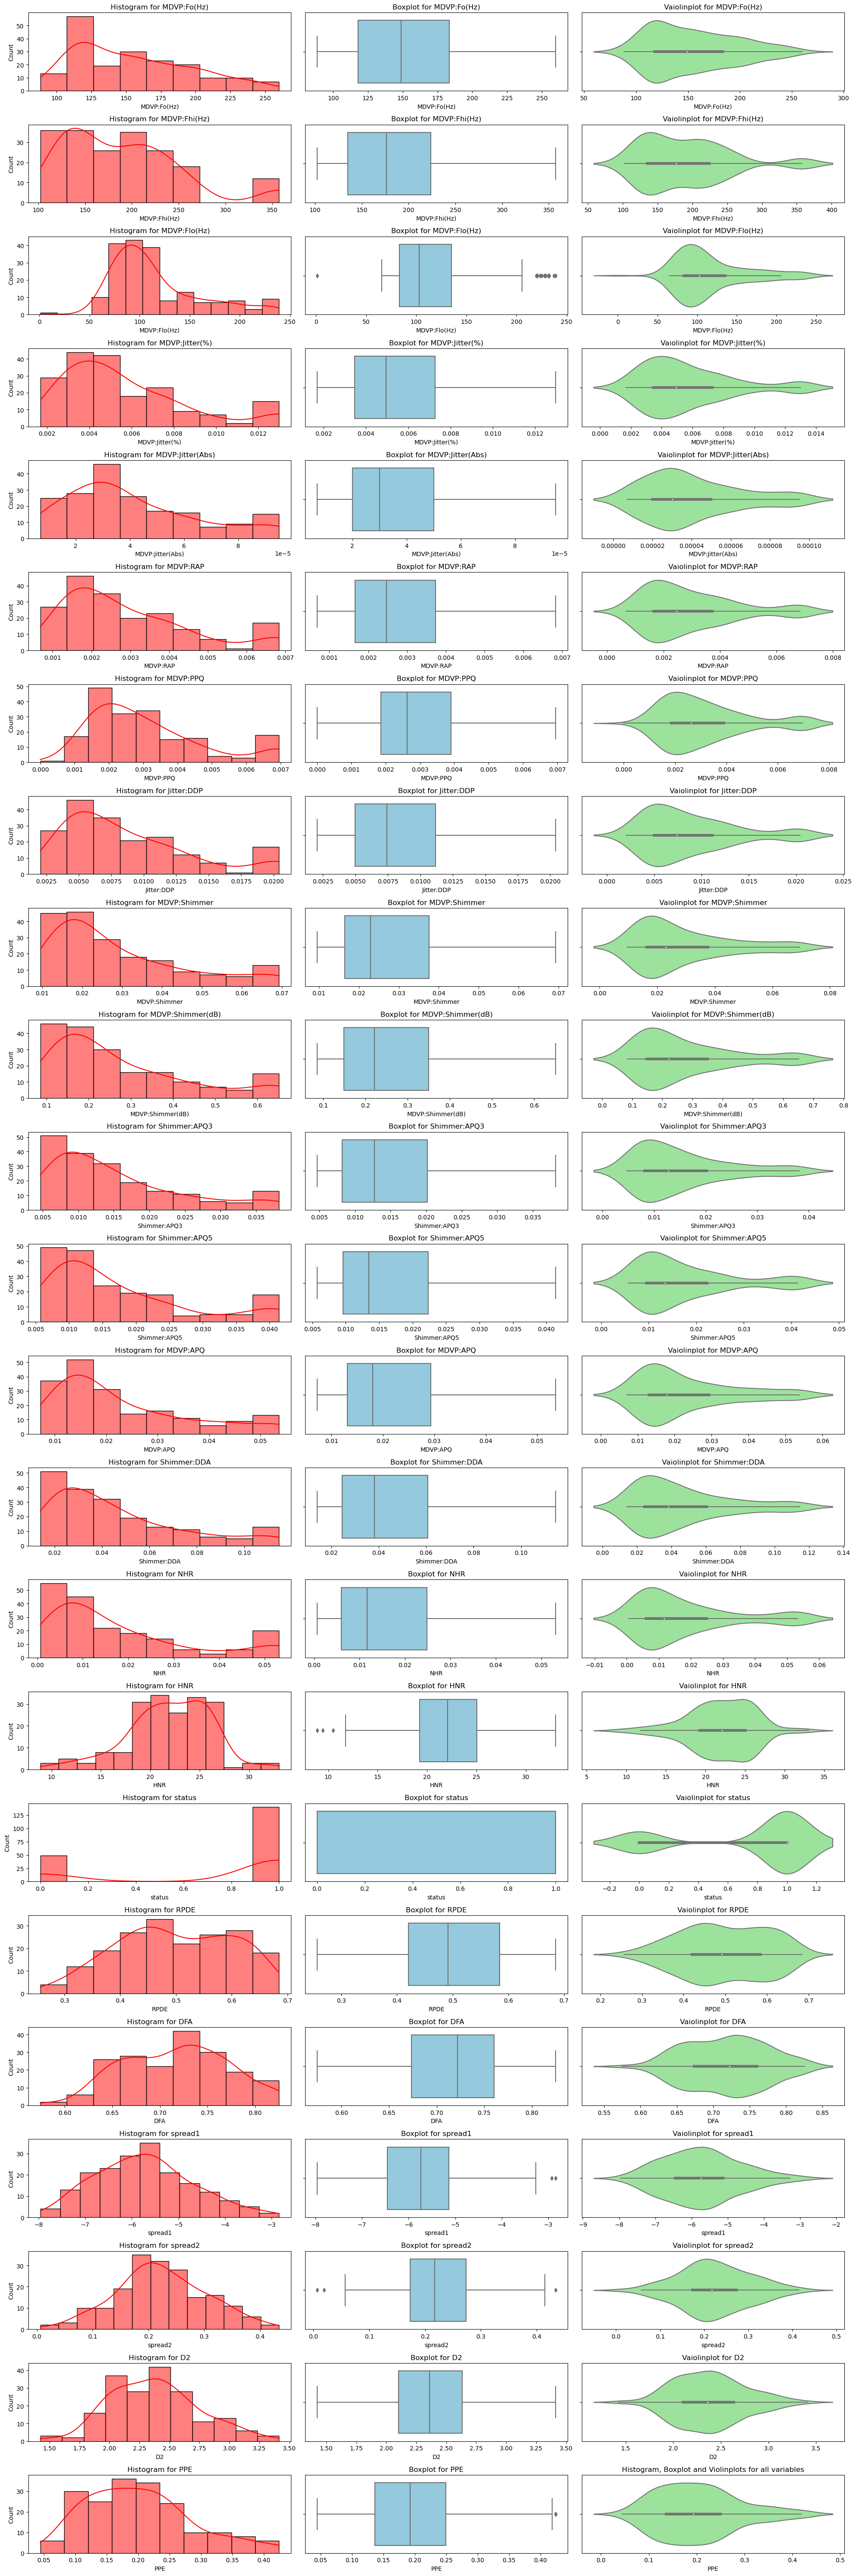

In [8]:
def plot_distribution_numerical(df):
    # Lets plot the histogram for each variable
    features = df.select_dtypes(include='number').columns

    # plot the subplot for histogram of each variable
    fig, axs = plt.subplots(23, 3, figsize=(20, 60))
    row = 0
    for feature in features:

        axs[row, 0].set_title("Histogram for {}".format(feature))
        sns.histplot(data=df, x=feature, kde=True, color="red", ax=axs[row, 0])

        axs[row, 1].set_title("Boxplot for {}".format(feature))
        sns.boxplot(data=df, x=feature,  color="skyblue", ax=axs[row, 1])

        axs[row, 2].set_title("Vaiolinplot for {}".format(feature))
        sns.violinplot(data=df, x=feature,  color="lightgreen", ax=axs[row, 2])
        row = row+1

    plt.title("Histogram, Boxplot and Violinplots for all variables")
    plt.tight_layout()
    plt.show()
    
plot_distribution_numerical(df)

### Conclusion - 

- As per the skewness, kurtosis and above histogram, boxplots and violinplots we can see that below columns are normally distributed - 
DFA, spread1, spread2, D2 and PPE

- Below columns are skewed to the right
'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA' 

## Bivariate analysis on numerical data

In [9]:
# Covariance for pair of variables
def covariance_of_pair_variables(df):
    features = df.select_dtypes(include='number').columns
    dic_covariance = {}

    for index1 in range(0, len(features)):
        for index2 in range(index1+1, len(features)):
            dic_covariance[features[index1] + " - " + features[index2]] = df[features[index1]].cov(df[features[index2]])
            
    covariance_df = pd.DataFrame(dic_covariance, index=["Covariance"]).T
    return covariance_df.sort_values(by='Covariance')


covariance_of_pair_variables(df)

Covariance
MDVP:Fo(Hz) - spread1         -19.036930
MDVP:Flo(Hz) - spread1        -18.886935
MDVP:Fhi(Hz) - spread1        -11.136002
MDVP:Flo(Hz) - status          -7.539918
MDVP:Fo(Hz) - status           -6.752753
...                                  ...
MDVP:Fo(Hz) - HNR              15.470941
MDVP:Flo(Hz) - HNR             40.242006
MDVP:Fhi(Hz) - MDVP:Flo(Hz)   526.454309
MDVP:Fo(Hz) - MDVP:Flo(Hz)   1081.942775
MDVP:Fo(Hz) - MDVP:Fhi(Hz)   1611.835232

[253 rows x 1 columns]

### Conclusion - 

Below pair of variables are having the lowest covariance - 
- MDVP:Fo(Hz) - spread1
- MDVP:Flo(Hz) - spread1
- MDVP:Fhi(Hz) - spread1
- MDVP:Flo(Hz) - status
- MDVP:Fo(Hz) - status
    
    
Below pair of variables are having the highest covariance - 
- MDVP:Fo(Hz) - HNR 
- MDVP:Flo(Hz) - HNR 
- MDVP:Fhi(Hz) - MDVP:Flo(Hz) 
- MDVP:Fo(Hz) - MDVP:Flo(Hz) 
- MDVP:Fo(Hz) - MDVP:Fhi(Hz)

<Axes: >

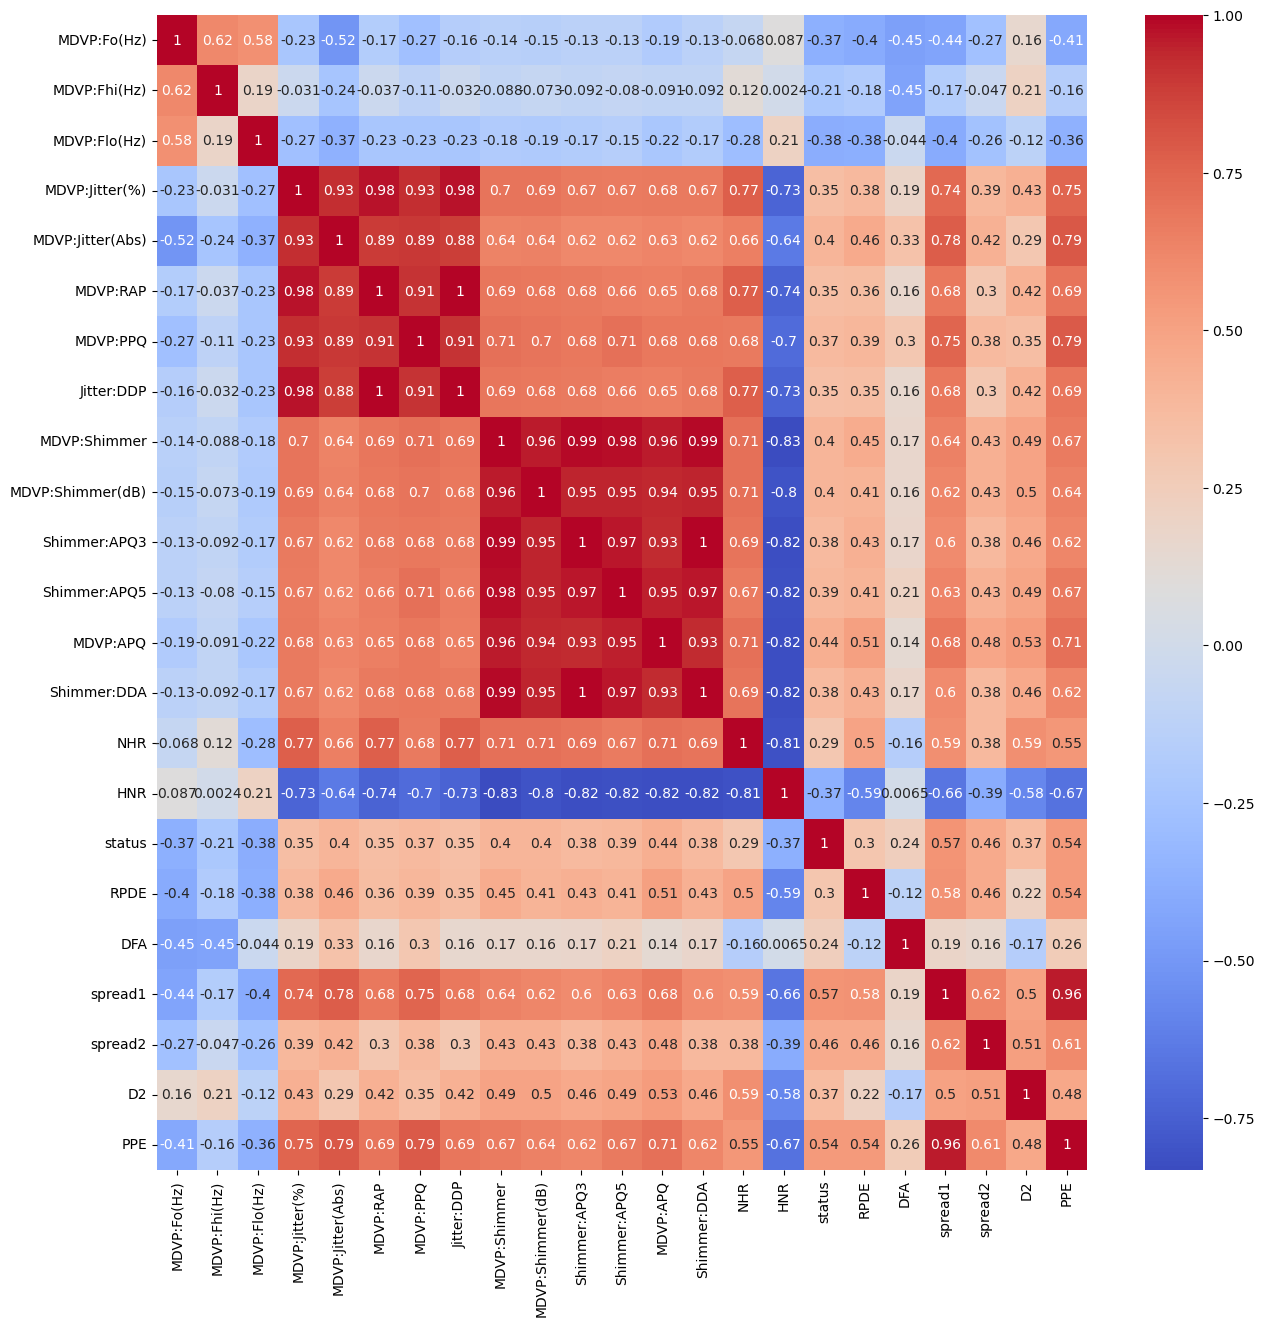

In [10]:
# Correlations matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

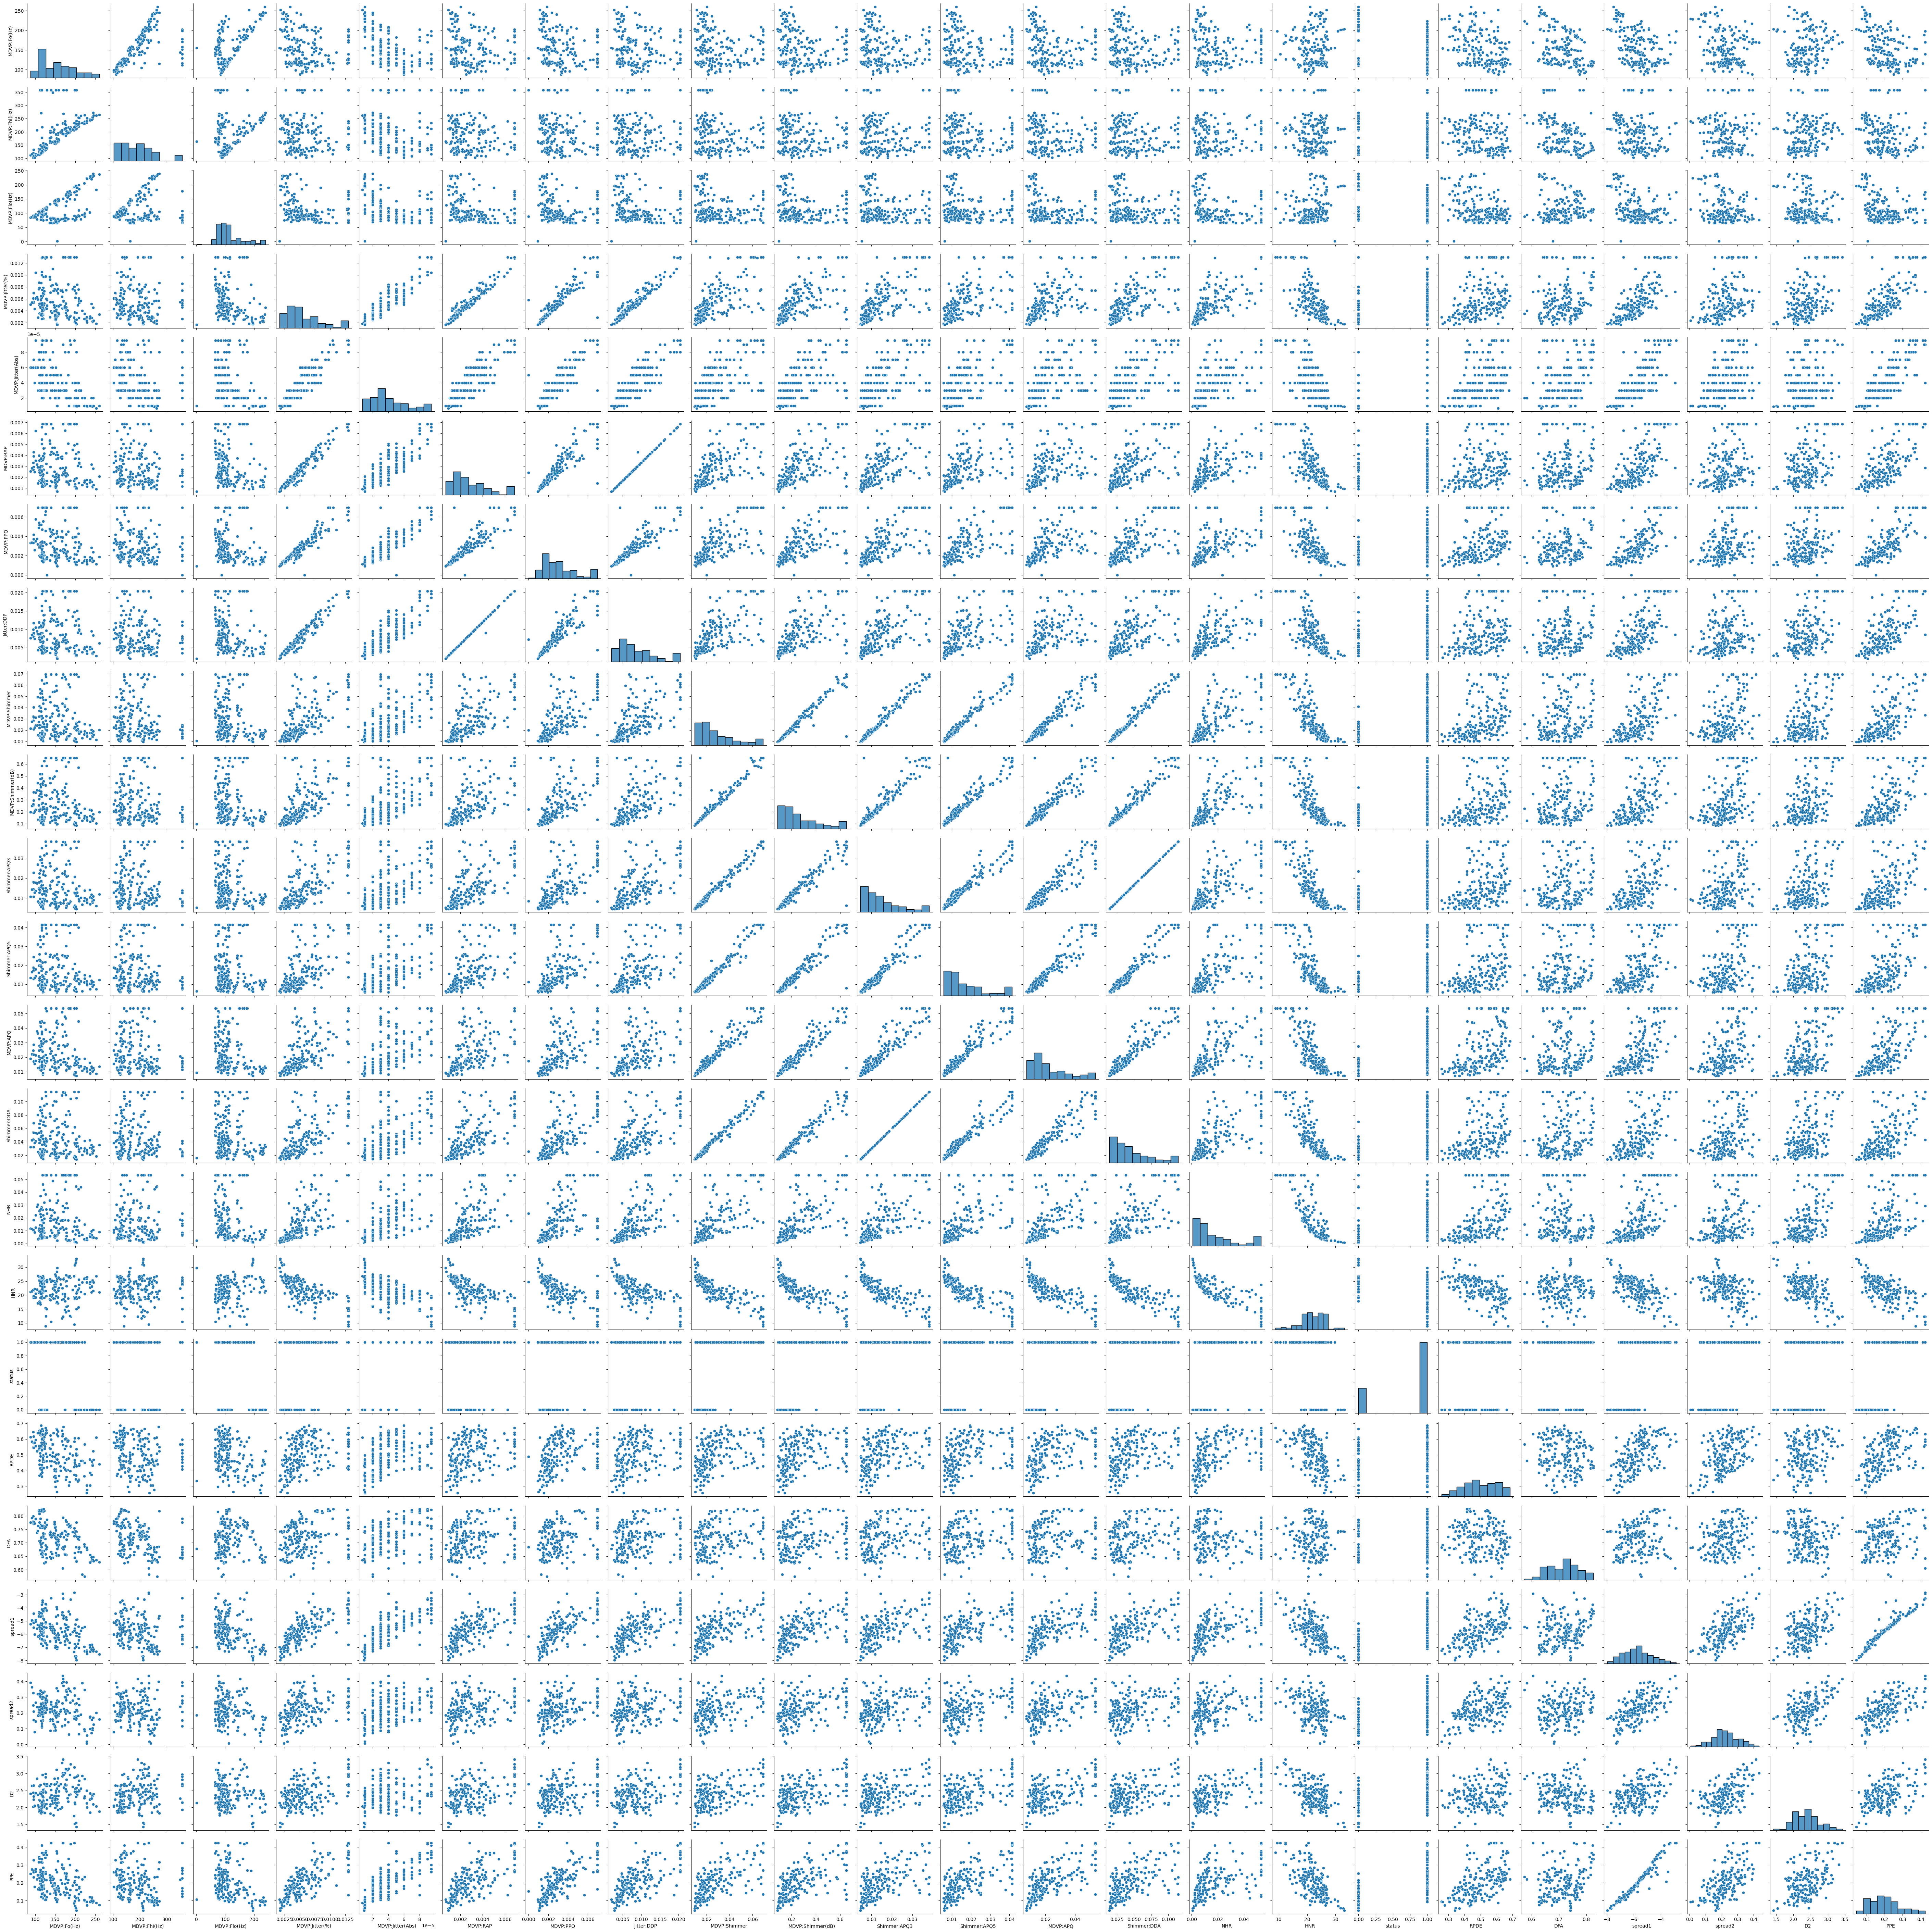

In [11]:
# plotting the scatterplots for all variables combinations 
sns.pairplot(df)

### Conclusions - 
As per the scatterplot and heatmap presented we can see that below variables are highly correlated to each other

- 'MDVP:Fo(Hz)' => 'MDVP:Fhi(Hz)'
- 'MDVP:Fo(Hz)' => 'MDVP:Flo(Hz)'
- 'MDVP:Flo(Hz)' => 'MDVP:Fhi(Hz)'
- 'MDVP:RAP'     => 'MDVP:Jitter(%)'
- 'MDVP:Jitter(%)'=> 'Jitter:DDP'
- 'MDVP:Jitter(%)'=> 'MDVP:PPQ'
- 'MDVP:Jitter(%)'=> 'MDVP:RAP'
- 'MDVP:Jitter(%)'=> 'NHR'
- 'MDVP:Shimmer' => 'MDVP:Shimmer',
- 'MDVP:Shimmer' => 'MDVP:Shimmer(dB)',
- 'MDVP:Shimmer' =>  'Shimmer:DDA',
- 'MDVP:Shimmer' => 'Shimmer:APQ5',
- 'MDVP:Shimmer' => 'NHR',
- 'MDVP:Shimmer' => 'Shimmer:APQ3',
- 'MDVP:Shimmer' => 'HNR'
- 'MDVP:Shimmer' => 'MDVP:APQ',

In [12]:
def t_test_for_two_groups(df, target_var, first_target, second_target):
    for feature in df.select_dtypes(include='number').columns:
        # Lets have two groups one for datapoints when "status is 0" and another when "status is 1"
        group_1 = df[df[target_var]==first_target][feature]
        group_0 = df[df[target_var]==second_target][feature]

        # Perform independent samples t-test
        t_statistic, p_value = ttest_ind(group_1, group_0)

        # Print the results
        print("\n---------{} for two outcomes of {}-------------\n".format(feature, target_var))
        print("T-statistic:", t_statistic)
        print("P-value:", p_value)

        # Interpret the results
        alpha = 0.05
        if p_value < alpha:
            print("Reject the null hypothesis: There is a significant difference in means of the two data groups of {} when {} is {} and {}".format(feature, target_var, first_target, second_target))
        else:
            print("Fail to reject the null hypothesis: There is NO significant difference in means of the two data groups of {} when {} is {} and {}".format(feature, target_var, first_target, second_target))
            
            
t_test_for_two_groups(df, 'status', 1, 0)


---------MDVP:Fo(Hz) for two outcomes of status-------------

T-statistic: -5.447839322812917
P-value: 1.592227189146496e-07
Reject the null hypothesis: There is a significant difference in means of the two data groups of MDVP:Fo(Hz) when status is 1 and 0

---------MDVP:Fhi(Hz) for two outcomes of status-------------

T-statistic: -2.971954624024861
P-value: 0.0033481631900441388
Reject the null hypothesis: There is a significant difference in means of the two data groups of MDVP:Fhi(Hz) when status is 1 and 0

---------MDVP:Flo(Hz) for two outcomes of status-------------

T-statistic: -5.692141471654098
P-value: 4.784923852241762e-08
Reject the null hypothesis: There is a significant difference in means of the two data groups of MDVP:Flo(Hz) when status is 1 and 0

---------MDVP:Jitter(%) for two outcomes of status-------------

T-statistic: 5.156002688801079
P-value: 6.389452642993178e-07
Reject the null hypothesis: There is a significant difference in means of the two data groups 

## Multivariate analysis on numerical data

In [13]:
from sklearn import datasets, decomposition 
# Split the DataFrame into X and Y datasets

# Features (independent variables)
X = data.drop(columns=['status', 'name'])  

# Target variable (dependent variable)
y = data['status']  


NameError: name 'data' is not defined

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#Combine PCA Components and Target Variable
df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df['Target'] = y

In [ ]:
#Apply Clustering Algorithm
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['PC1', 'PC2', 'Target']])

In [ ]:
# Visualize clustering results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', style='Target', palette='viridis')
plt.title('PCA Clustering based on Target Variable')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()